In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import re 
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
wdf = pd.read_csv("./datasets/weather_data.csv")

In [93]:
wdf.head()

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,Admiralty,2022.0,1.0,1.0,17.0,8.6,13.4,14.2,24.9,29.7,23.5,14.9,42.8
1,Admiralty,2022.0,1.0,2.0,43.6,8.0,12.8,14.6,23.7,24.7,23.3,8.3,35.2
2,Admiralty,2022.0,1.0,3.0,1.0,0.6,0.6,0.6,25.3,29.2,23.1,11.6,29.1
3,Admiralty,2022.0,1.0,4.0,31.8,19.0,19.6,30.4,25.5,30.5,23.7,15.5,50.0
4,Admiralty,2022.0,1.0,5.0,11.2,11.2,11.2,11.2,27.4,32.3,24.7,16.8,42.4


In [94]:
#Remove day as data is be too granular for our use case, will avg based on region, year, month instead
del wdf['Day']
#Rename cols to match elec data as will be joining base on: Towns, Year, Month
wdf = wdf.rename(columns={'Station': 'Towns'})

In [95]:
#Exploring the weather data, realised there are same town names just (east) and (west) versions
#Thus, aim to find such towns and combine together and take the avg metrics
towns = wdf.Towns.unique()
towns_with_brac = []
for town in towns:
    if "(" in town:
        towns_with_brac.append(town)
towns_with_brac.sort()

print(towns_with_brac,"\n")

#Remove the brackets and combine into unique list of dup towns
unique_towns_with_brac = []
for town in towns_with_brac:
    unique_towns_with_brac.append(re.sub("([\(\[]).*?([\)\]])", "", town).strip())
unique_towns_with_brac = list(dict.fromkeys(unique_towns_with_brac))
print(unique_towns_with_brac)

#Replace towns 
for town in unique_towns_with_brac:
    wdf.loc[wdf['Towns'].str.contains(town, case=False), 'Towns'] = town

['Boon Lay (East)', 'Boon Lay (West)', 'Choa Chu Kang (Central)', 'Choa Chu Kang (South)', 'Choa Chu Kang (West)', 'Jurong (East)', 'Jurong (North)', 'Jurong (West)', 'Pasir Ris (Central)', 'Pasir Ris (West)', 'Somerset (Road)'] 

['Boon Lay', 'Choa Chu Kang', 'Jurong', 'Pasir Ris', 'Somerset']


In [96]:
eda_wdf = wdf.copy()

In [97]:
eda_wdf.dropna(inplace=True)

In [98]:
pd.to_datetime(wdf['Year'].astype(float))

0        1970-01-01 00:00:00.000002022
1        1970-01-01 00:00:00.000002022
2        1970-01-01 00:00:00.000002022
3        1970-01-01 00:00:00.000002022
4        1970-01-01 00:00:00.000002022
                      ...             
551156   1970-01-01 00:00:00.000001980
551157   1970-01-01 00:00:00.000001980
551158   1970-01-01 00:00:00.000001980
551159   1970-01-01 00:00:00.000001980
551160   1970-01-01 00:00:00.000001980
Name: Year, Length: 551161, dtype: datetime64[ns]

In [99]:
eda_wdf['Day'] = pd.to_datetime(eda_wdf[['Year', 'Month']].assign(DAY=1))
eda_wdf = eda_wdf.set_index(eda_wdf['Day'])
eda_wdf.head()

,Towns,Year,Month,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Day
Day,,,,,,,,,,,,,
2022-01-01,Admiralty,2022.0,1.0,17.0,8.6,13.4,14.2,24.9,29.7,23.5,14.9,42.8,2022-01-01
2022-01-01,Admiralty,2022.0,1.0,43.6,8.0,12.8,14.6,23.7,24.7,23.3,8.3,35.2,2022-01-01
2022-01-01,Admiralty,2022.0,1.0,1.0,0.6,0.6,0.6,25.3,29.2,23.1,11.6,29.1,2022-01-01
2022-01-01,Admiralty,2022.0,1.0,31.8,19.0,19.6,30.4,25.5,30.5,23.7,15.5,50.0,2022-01-01
2022-01-01,Admiralty,2022.0,1.0,11.2,11.2,11.2,11.2,27.4,32.3,24.7,16.8,42.4,2022-01-01


In [102]:
eda_wdf.drop(columns='Day', axis=1, inplace=True)

In [104]:
eda_wdf.groupby(['Day']).mean()

,Year,Month,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
Day,,,,,,,,,,,
2014-01-01,2014.0,1.0,2.455242,1.177823,1.431048,1.640726,26.279839,29.772984,24.104839,9.633468,34.787097
2014-02-01,2014.0,2.0,0.850559,0.591051,0.762416,0.822819,27.241834,31.995302,24.441163,10.105369,34.108501
2014-03-01,2014.0,3.0,3.586456,2.009833,2.471058,2.884416,27.769759,32.227087,25.116512,9.075139,32.922449
2014-04-01,2014.0,4.0,5.724624,3.891165,4.725752,5.186090,28.211842,32.177444,25.463534,6.017293,29.986842
2014-05-01,2014.0,5.0,7.082914,4.446942,5.641906,6.167266,28.559173,32.048921,25.770144,6.228957,29.843345
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,2022.0,4.0,7.620527,4.956309,6.089454,6.708851,28.021846,32.322222,25.018079,6.092279,31.423917
2022-05-01,2022.0,5.0,6.088807,3.503303,4.412661,5.116330,29.079083,32.943303,26.117982,7.511009,32.309541
2022-06-01,2022.0,6.0,7.445143,4.894095,6.046286,6.808952,27.824190,31.181905,24.969524,6.717524,31.518286


In [105]:
eda_wdf.sort_values(by=['Year', 'Month'], inplace=True)

In [112]:
eda_wdf.head()

,Towns,Year,Month,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
Day,,,,,,,,,,,,
2014-01-01,Admiralty,2014.0,1.0,0.0,0.0,0.0,0.0,26.3,28.8,24.3,10.8,34.2
2014-01-01,Admiralty,2014.0,1.0,0.0,0.0,0.0,0.0,26.9,30.7,24.6,11.5,38.2
2014-01-01,Admiralty,2014.0,1.0,4.6,4.4,4.4,4.6,26.5,29.5,24.9,9.7,34.2
2014-01-01,Admiralty,2014.0,1.0,3.8,3.8,3.8,3.8,26.4,31.2,24.7,8.1,32.8
2014-01-01,Admiralty,2014.0,1.0,3.6,1.2,1.6,2.0,24.6,25.3,23.6,8.4,27.0


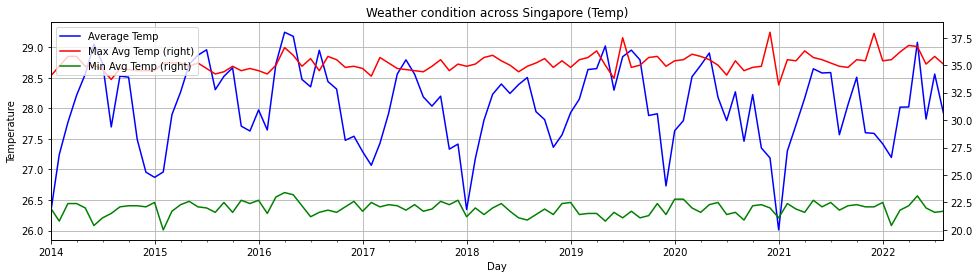

In [143]:
plt.figure(figsize=(16,4))
plt.title('Weather condition across Singapore (Temp)')
ax1 = eda_wdf.groupby('Day')['Mean Temperature (°C)'].mean().plot(color='blue', grid=True, label='Average Temp')
ax2 = eda_wdf.groupby('Day')['Maximum Temperature (°C)'].max().plot(color='red', grid=True,  secondary_y=True, label='Max Avg Temp')
ax3 = eda_wdf.groupby('Day')['Minimum Temperature (°C)'].min().plot(color='green', grid=True,  secondary_y=True, label='Min Avg Temp')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.set_ylabel('Temperature')
plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

In [144]:
wdf.describe()

,Year,Month,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
count,550767.000000,550767.000000,539388.000000,162019.000000,161920.000000,161923.000000,117844.000000,137188.000000,137139.000000,136876.000000,101895.000000
mean,2004.958187,6.489405,6.747874,3.815631,4.719599,5.338908,27.740723,31.706317,24.879197,8.387980,32.768306
std,12.375964,3.438807,14.594205,7.596928,9.783395,11.220780,1.206219,1.701221,1.460878,3.704354,9.493503
min,1980.000000,1.000000,0.000000,0.000000,0.000000,0.000000,22.200000,22.800000,0.000000,0.200000,0.000000
25%,1995.000000,4.000000,0.000000,0.000000,0.000000,0.000000,26.900000,30.700000,23.800000,5.800000,26.300000
50%,2009.000000,6.000000,0.200000,0.200000,0.200000,0.200000,27.800000,31.900000,24.700000,7.700000,31.300000
75%,2015.000000,9.000000,6.300000,3.800000,4.400000,5.000000,28.600000,32.900000,25.800000,10.200000,37.100000
max,2022.000000,12.000000,278.600000,71.800000,104.600000,148.600000,31.700000,38.000000,34.700000,66.600000,138.600000


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Daily Rainfall Total (mm)'}>],
       [<AxesSubplot:title={'center':'Highest 30 min Rainfall (mm)'}>,
        <AxesSubplot:title={'center':'Highest 60 min Rainfall (mm)'}>,
        <AxesSubplot:title={'center':'Highest 120 min Rainfall (mm)'}>],
       [<AxesSubplot:title={'center':'Mean Temperature (°C)'}>,
        <AxesSubplot:title={'center':'Maximum Temperature (°C)'}>,
        <AxesSubplot:title={'center':'Minimum Temperature (°C)'}>],
       [<AxesSubplot:title={'center':'Mean Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Max Wind Speed (km/h)'}>,
        <AxesSubplot:>]], dtype=object)

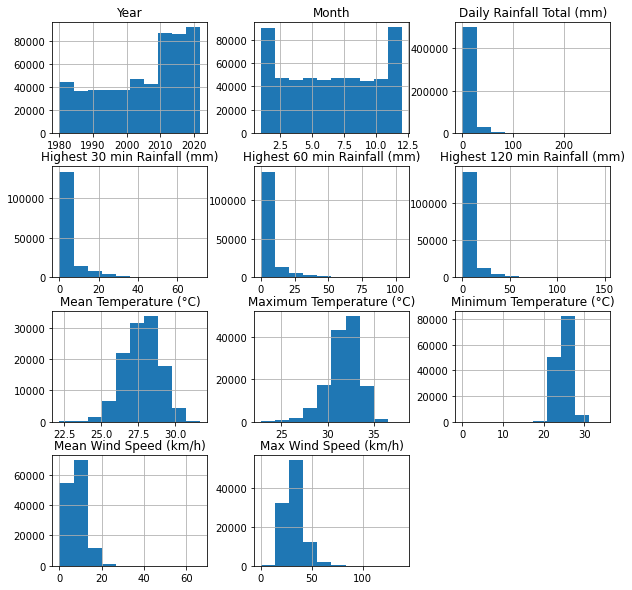

In [145]:
wdf.hist(figsize=(10,10))